In [1]:
%matplotlib inline

In [10]:
import lsst.sims.skybrightness as sb
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.maf.utils.telescopeInfo import TelescopeInfo
from lsst.sims.utils import calcLmstLast

In [7]:
sm = sb.SkyModel(mags=True)

In [8]:
# Set up a grid of RA,Dec points to compute the sky model on
nside = 16
hpmap = np.zeros(hp.nside2npix(nside))
lat, ra = hp.pix2ang(nside, np.arange(hpmap.size))
dec = np.pi/2-lat

In [21]:
sm.setRaDecMjd(ra,dec,49353.04)
np.degrees(sm.sunAlt)
lmst,last = calcLmstLast(sm.mjd, sm.Observatory.lon)
sm.computeSpec()

In [22]:
filters = ['u','g','r','i','z','y']
mags = sm.computeMags()

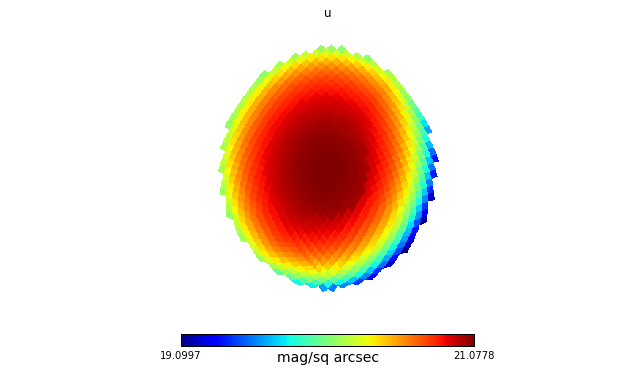

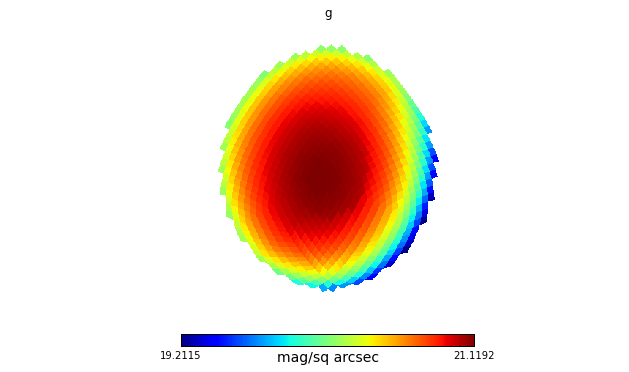

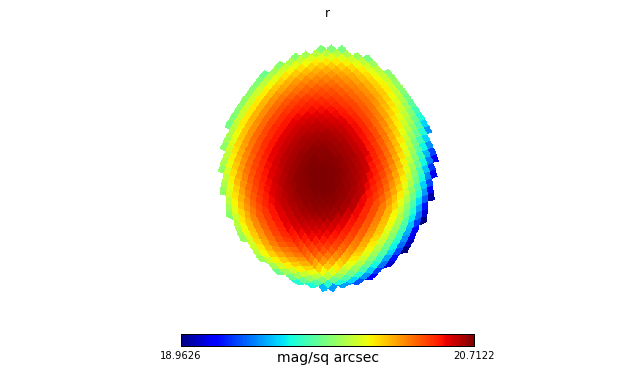

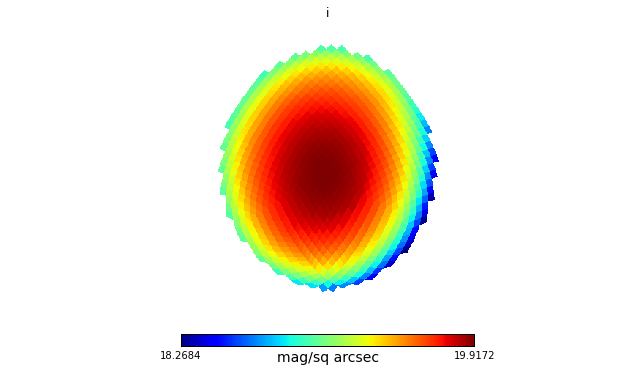

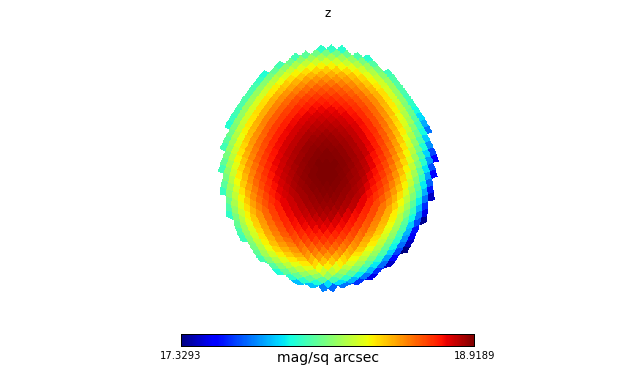

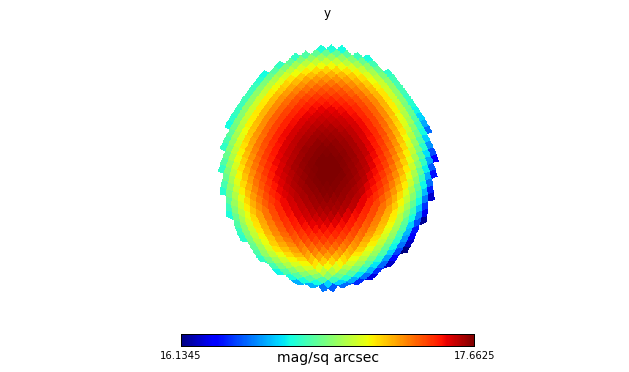

In [23]:
for i,filterName in enumerate(filters):
    hp.mollview(mags[:,i], unit='mag/sq arcsec', title=filterName,rot=(lmst*15, np.degrees(sm.Observatory.lat)))